In [39]:
#perintah-perintah di bawah digunakan untuk mengambil fungis-fungsi dari suatu library tertentu
import numpy as np #berfungsi untuk memanggil import numpy yang diinisialkan dengan np
#library numpy digunakan untuk membuat array dan matriks
import cv2 #library cv2 digunakan untuk memodifikasi gambar
import matplotlib.pyplot as plt #berfungsi untuk memanggil import matplotlib.pyplot yang diinisialkan dengan plt
#library matplotlib digunakan untuk membuat sebuah visualisasi/diagram

In [40]:
#script di bawah berfungsi untuk membaca citra dengan menggunakan fungsi dari cv2 yaitu imread
image1 = cv2.imread("BASOPHIL.png", 2)
image2 = cv2.imread("EOSINOPHIL.png", 2)
image3 = cv2.imread("LYMPHOCYTE.png", 2)
image4 = cv2.imread("MONOCYTE.png", 2)
image5 = cv2.imread("NEUTROPHIL.png", 2)

#script di bawah merupakan sebuah proses thresholding yang digunakan untuk mengubah citra berderajat keabuan menjadi citra biner atau hitam putih agar membedakan background dengan citra 
#script "cv2.THRESH_BINARY+cv2.THRESH_OTSU" digunakan untuk melakukan threshold pada citra yang menggunakan jenis threshold binary + threhold otsu
ret, thres1 = cv2.threshold(image1, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU) 
ret, thres2 = cv2.threshold(image2, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
ret, thres3 = cv2.threshold(image3, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
ret, thres4 = cv2.threshold(image4, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
ret, thres5 = cv2.threshold(image5, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

baris,kolom = image1.shape #digunakan untuk mencetak ukuran dimensi dari citra 

#setelah dilakukan threshold maka selanjutnya dilakukan perubahan tiap isi matriks dengan dibagi dengan 255 dengan tipe data integer
img1 = np.array(thres1/255, dtype=int) 
img2 = np.array(thres2/255, dtype=int)
img3 = np.array(thres3/255, dtype=int)
img4 = np.array(thres4/255, dtype=int)
img5= np.array(thres5/255, dtype=int)

In [41]:
plt.figure(figsize=(20,20)) #script ini memiliki fungsi untuk membuat sebuah 'bingkai' yang berukuran figsize=(20,20)

#digunakan untuk menampilkan gambar
plt.subplot(151),plt.imshow(thres1, 'gray')
plt.title('BASOPHIL')

plt.subplot(152),plt.imshow(thres2, 'gray')
plt.title('EOSINOPHIL')

plt.subplot(153), plt.imshow(thres3, 'gray')
plt.title('LYMPHOCYTE')

plt.subplot(154), plt.imshow(thres4, 'gray')
plt.title('MONOCYTE')

plt.subplot(155), plt.imshow(thres5, 'gray')
plt.title('NEUTROPHIL')
#script diatas berfungsi untuk menampilkan citra hasil threshold ddengan menggunakan plot

Text(0.5, 1.0, 'NEUTROPHIL')

In [42]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7))
#script di atas digunakan untuk membuat suatu matriks dengan dimensi 7x7 berbentuk ellips
print(kernel)
#script di atas digunakan untuk menampilkan kernel

[[0 0 0 1 0 0 0]
 [0 1 1 1 1 1 0]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [0 1 1 1 1 1 0]
 [0 0 0 1 0 0 0]]


In [43]:
#membuat sebuah fungsi padding dengan parameternya image dan banyak_padd
def padding (image,banyak_padd):
    imgpad=np.pad(image,(banyak_padd,banyak_padd),mode='symmetric')
    #untuk mengembalikan nilai variabel imagpad
    return imgpad

EROSI

In [44]:
#membuat sebuah fungsi erosi yang digunakan untuk menyimpan proses dilasi dari suatu citra
def erosi (c):
    #membuat variabel hasil untuk menyimpan nilai matriks kosong dengan menggunakan np.zeros
    hasil = np.zeros (c.shape) 
    #membuat perulangan variabel i dengan jangkauannya adalah nilai variabel baris 
    for i in range(baris):
        #membuat perulangan variabel j dengan jangkauannya adalah nilai variabel kolom
        for j in range(kolom):
        #jika kondisi memenuhi kondisi
            if((c[i,j] == 0) or (c[i,j+1] == 0) or (c[i,j+2] == 0) or (c[i+1,j] == 0) or (c[i+1,j+1] == 0) or (c[i+1,j+2] == 0) or (c[i+2,j] == 0) or (c[i+2,j+1] == 0) or (c[i+2,j+2] == 0)):
                #maka akan dilakukan perintah di bawah
                hasil[i,j] = hasil[i,j+1] = hasil[i,j+2] = hasil[i+1,j] = hasil[i+1,j+1] = hasil[i+1,j+2] = hasil[i+2,j] = hasil[i+2,j+1] = hasil[i+2,j+2] = 0
            #jika kondisi tidak memenuhi kondisi pertama, maka dilakukan perintah di bawah
            else:
                hasil[i,j] = c[i,j]
    #untuk mengembalikan nilai variabel hasil             
    return hasil

Text(0.5, 1.0, 'NEUTROPHIL')

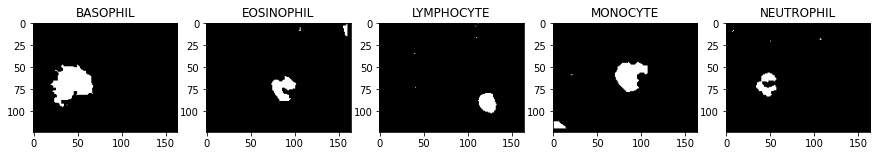

In [45]:
#membuat variabel yang menyimpan hasil dari eksekusi dari fungsi padding
imgEro1 = padding(image1,2)
imgEro2 = padding(image2,2)
imgEro3 = padding(image3,2)
imgEro4 = padding(image4,2)
imgEro5 = padding(image5,2)

#membuat variabel yang akan menyimpan hasil eksekusi dari fungsi erosi
erosi1=erosi(imgEro1)
erosi2=erosi(imgEro2)
erosi3=erosi(imgEro3)
erosi4=erosi(imgEro4)
erosi5=erosi(imgEro5)

plt.figure(figsize=(15,15))#script ini memiliki fungsi untuk membuat sebuah 'bingkai' yang berukuran figsize=(20,20)

#digunakan untuk menampilkan hasil erosi
plt.subplot(151),plt.imshow(erosi1, 'gray')
plt.title('BASOPHIL')

plt.subplot(152),plt.imshow(erosi2, 'gray')
plt.title('EOSINOPHIL')

plt.subplot(153), plt.imshow(erosi3, 'gray')
plt.title('LYMPHOCYTE')

plt.subplot(154), plt.imshow(erosi4, 'gray')
plt.title('MONOCYTE')

plt.subplot(155), plt.imshow(erosi5, 'gray')
plt.title('NEUTROPHIL')

DILASI

In [46]:
#membuat sebuah fungsi dilasi yang digunakan untuk menyimpan proses dilasi dari suatu citra
def dilasi (c): 
    #membuat variabel hasil untuk menyimpan nilai matriks kosong dengan menggunakan np.zeros
    hasil = np.zeros (c.shape)
    #membuat perulangan variabel i dengan jangkauannya adalah nilai variabel baris 
    for i in range(baris):
        #membuat perulangan variabel j dengan jangkauannya adalah nilai variabel kolom
        for j in range(kolom):
        #jika kondisi memenuhi c[i,j]==1
            if(c[i,j]==1):
                #akan memnajalankan perintah di bawah
                hasil[i,j] = hasil[i,j+1] = hasil[i,j+2] = hasil[i+1,j] = hasil[i+1,j+1] = hasil[i+1,j+2] = hasil[i+2,j] = hasil[i+2,j+1] = hasil[i+2,j+2] = 1
            #jika kondisi memenuhi hasil[i,j]==1
            elif(hasil[i,j]==1):
                #akan memnajalankan perintah di bawah
                hasil[i,j] = hasil[i,j]
            #jika tidak memenuhi kondisi pertama dan kedua maka akan dilakukan perintah di bawah
            else:
                hasil[i,j] = c[i,j]
    #untuk mengembalikan nilai variabel hasil
    return hasil

Text(0.5, 1.0, 'NEUTROPHIL')

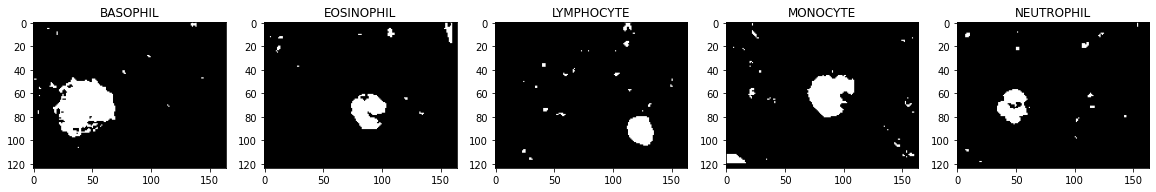

In [47]:
#membuat variabel yang menyimpan hasil dari eksekusi dari fungsi padding
imgDil1 = padding(image1,2)
imgDil2 = padding(image2,2)
imgDil3 = padding(image3,2)
imgDil4 = padding(image4,2)
imgDil5 = padding(image5,2)

#membuat variabel yang akan menyimpan hasil eksekusi dari fungsi dilasi
dilasi1=dilasi(imgDil1)
dilasi2=dilasi(imgDil2)
dilasi3=dilasi(imgDil3)
dilasi4=dilasi(imgDil4)
dilasi5=dilasi(imgDil5)

plt.figure(figsize=(20,20)) #script ini memiliki fungsi untuk membuat sebuah 'bingkai' yang berukuran figsize=(20,20)

#digunakan untuk menampilkan hasil dilasi
plt.subplot(151),plt.imshow(dilasi1, 'gray')
plt.title('BASOPHIL')

plt.subplot(152),plt.imshow(dilasi2, 'gray')
plt.title('EOSINOPHIL')

plt.subplot(153), plt.imshow(dilasi3, 'gray')
plt.title('LYMPHOCYTE')

plt.subplot(154), plt.imshow(dilasi4, 'gray')
plt.title('MONOCYTE')

plt.subplot(155), plt.imshow(dilasi5, 'gray')
plt.title('NEUTROPHIL')

OPENING

In [48]:
plt.figure(figsize=(20,20)) #script ini memiliki fungsi untuk membuat sebuah 'bingkai' yang berukuran figsize=(20,20)

#digunakan untuk menampilkan hasil gambar
plt.subplot(151), plt.imshow (cv2.dilate(erosi1, kernel, iterations = 1), cmap = "gray")
plt.title('BASOPHIL')

plt.subplot(152), plt.imshow (cv2.dilate(erosi2, kernel, iterations = 1), cmap = "gray")
plt.title('EOSINOPHIL')

plt.subplot(153), plt.imshow(cv2.dilate(erosi3, kernel, iterations = 1), cmap = "gray")
plt.title('LYMPHOCYTE')

plt.subplot(154), plt.imshow(cv2.dilate(erosi4, kernel, iterations = 1), cmap = "gray")
plt.title('MONOCYTE')

plt.subplot(155), plt.imshow(cv2.dilate(erosi5, kernel, iterations = 1), cmap = "gray")
plt.title('NEUTROPHIL')

Text(0.5, 1.0, 'NEUTROPHIL')

CLOSING

Text(0.5, 1.0, 'NEUTROPHIL')

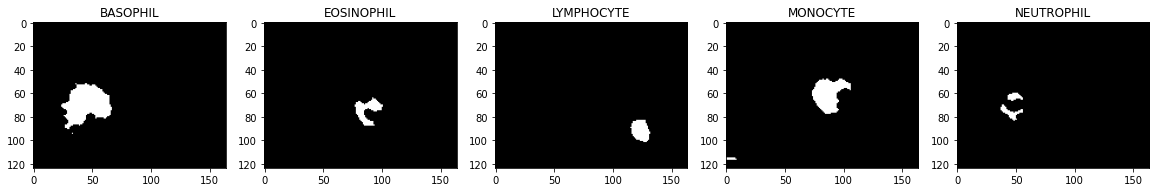

In [49]:
plt.figure(figsize=(20,20)) #script ini memiliki fungsi untuk membuat sebuah 'bingkai' yang berukuran figsize=(20,20)

#digunakan untuk menampilkan hasil gambar
plt.subplot(151), plt.imshow(cv2.erode(dilasi1, kernel, iterations = 1), cmap = "gray")
plt.title('BASOPHIL')

plt.subplot(152), plt.imshow(cv2.erode(dilasi2, kernel, iterations = 1), cmap = "gray")
plt.title('EOSINOPHIL')

plt.subplot(153), plt.imshow(cv2.erode(dilasi3, kernel, iterations = 1), cmap = "gray")
plt.title('LYMPHOCYTE')

plt.subplot(154), plt.imshow(cv2.erode(dilasi4, kernel, iterations = 1), cmap = "gray")
plt.title('MONOCYTE')

plt.subplot(155), plt.imshow(cv2.erode(dilasi5, kernel, iterations = 1), cmap = "gray")
plt.title('NEUTROPHIL')